# TensorFlow Lending Club Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data 

In [2]:
df = pd.read_csv('files/lending_club_loan_two.csv')
df.info() # 396K loans, object format some feature engineering required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [3]:
# Lots of feature engineering required 

# extract numerical value from term 
# dummies or numerical for grade and subgrade
# extract numerical value from emp_length
# dummies for home_ownership
# dummies for verification_status
# dummies for loan status
# dummies for purpose
# Change issue_d to datetime
# Change earliest_cr_line to datetime
# dummies for initial list status
# dummies for application type
# Change address to house vs apt using NLP 
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [4]:
df.describe() # scaling required 

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## EDA 

#### Check for missing values

In [5]:
df.isnull().mean() # some missing values will need to be filled in 

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

###### Employment Length

In [6]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [7]:
# Fill nan employment lengths with mode
df['emp_length'] = df['emp_length'].apply(lambda x: np.array(df['emp_length'].mode())[0] if x == 'nan' else x)

In [8]:
# Fill NaN employment lengths with mode
df['emp_length'].fillna(lambda x: np.array(df['emp_length'].mode())[0], inplace=True)

###### Mortgage Accounts

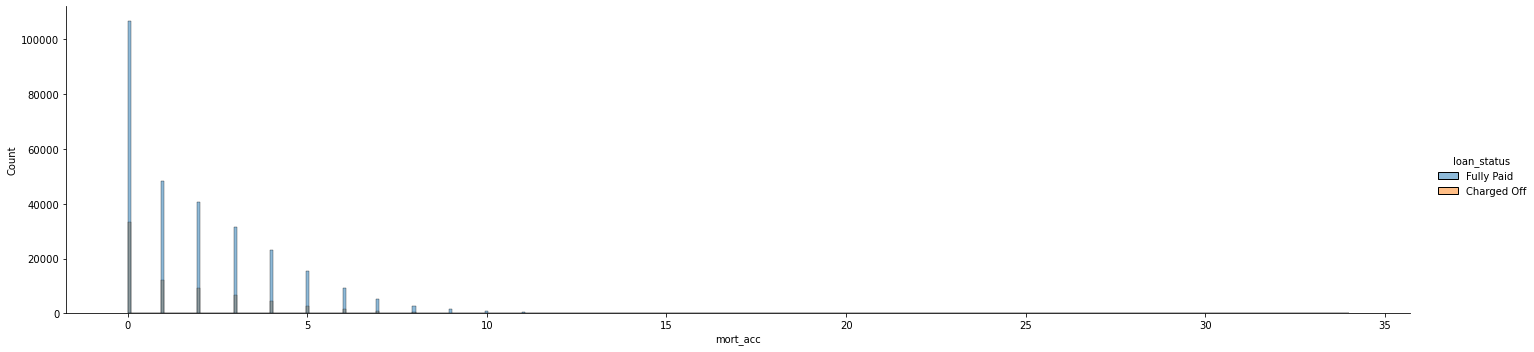

In [9]:
# very skewed use mode or median
sns.displot(x='mort_acc', data=df, hue='loan_status', aspect=4)

In [10]:
# Fill null with mode
df['mort_acc'].fillna(np.array(df['mort_acc'].mode())[0], inplace=True)

###### Public Record Bankruptcies

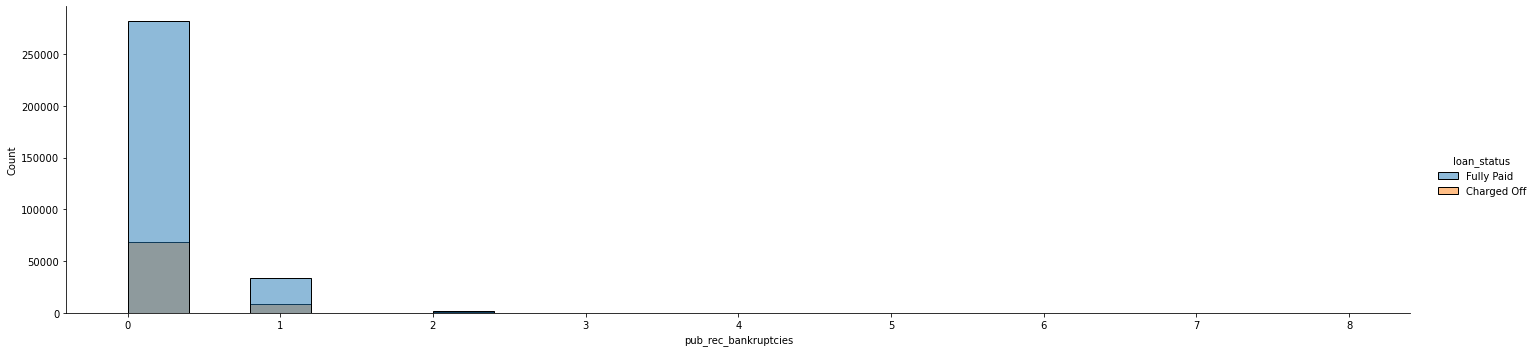

In [11]:
# very skewed use mode 0 
sns.displot(x='pub_rec_bankruptcies', data=df, hue='loan_status', aspect=4)

In [12]:
# Fill null with mode
df['pub_rec_bankruptcies'].fillna(np.array(df['pub_rec_bankruptcies'].mode())[0], inplace=True)

##### Revolving Line Utilization  

<AxesSubplot:xlabel='revol_util'>

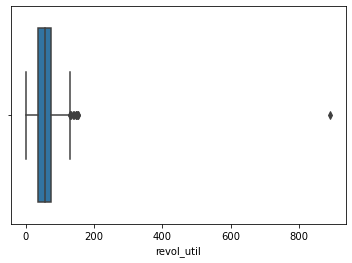

In [13]:
# Can't be more than 100%, fix outliers 
sns.boxplot(x='revol_util', data=df)

<ipython-input-14-4f09ecb21b98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revol_util'][df['revol_util'] > 100] = 100


<AxesSubplot:xlabel='revol_util'>

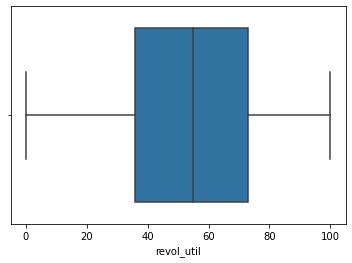

In [14]:
# remove outliers
df['revol_util'][df['revol_util'] > 100] = 100
sns.boxplot(x='revol_util', data=df)

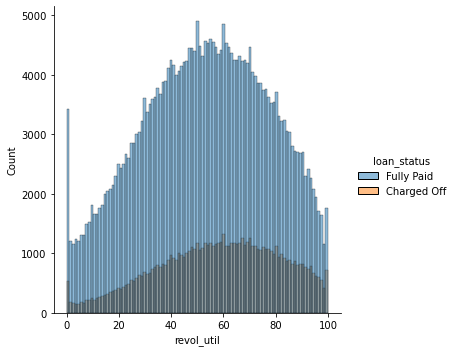

In [15]:
# fairly normal, a little skewed use median
sns.displot(x='revol_util', data=df, hue='loan_status')

In [16]:
df['revol_util'].median() # pretty good

54.8

In [17]:
# fill null values with median
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['revol_util'].isnull().mean() # no more nulls

0.0

In [18]:
df.isnull().mean()  # no more missing values for important features (titles not useful in our analysis)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
dtype: float64

#### General relationship to default

In [19]:
# interest rate highest 
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df.corr()['default'].sort_values()

mort_acc               -0.057771
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009416
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082457
int_rate                0.247758
default                 1.000000
Name: default, dtype: float64

#### Proportion of paid vs defaulted loans

<AxesSubplot:xlabel='loan_status', ylabel='count'>

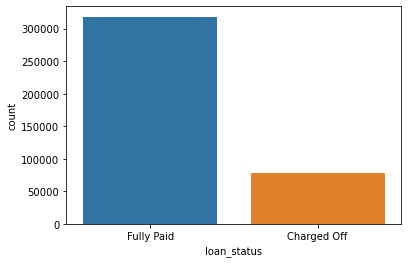

In [20]:
sns.countplot(data=df, x='loan_status')

In [21]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

#### Default rate based on Grade 

<AxesSubplot:xlabel='grade', ylabel='count'>

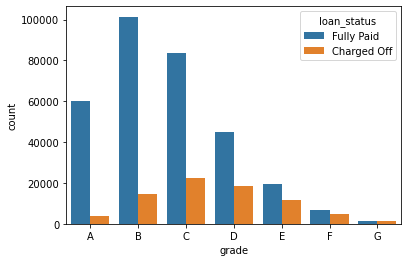

In [22]:
sns.countplot(x='grade', hue='loan_status', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

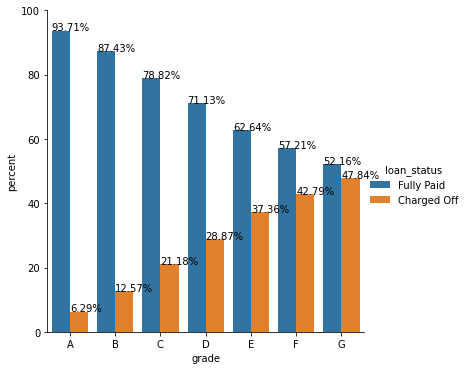

In [23]:
x,y = 'grade', 'loan_status'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Default rate based on income

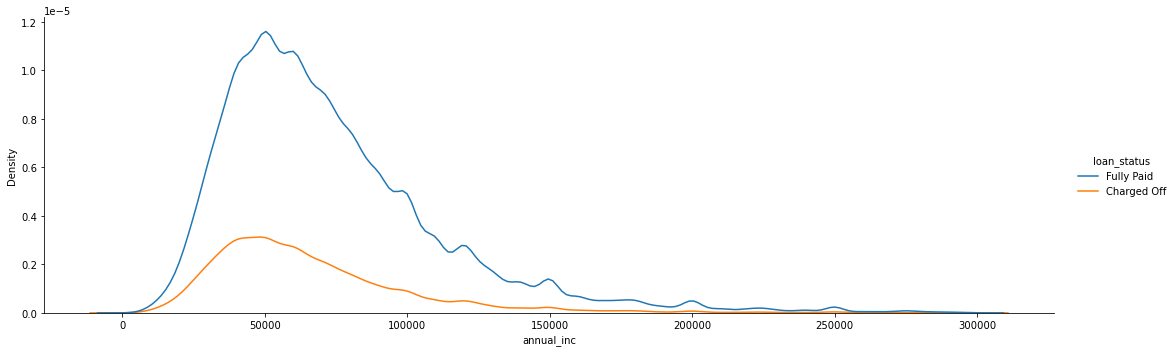

In [24]:
no_outliers = df[df['annual_inc'] < 300000]
sns.displot(x='annual_inc', data=no_outliers, hue='loan_status', kind='kde', aspect=3)

#### Loan terms based on income 

In [25]:
term = np.array(list(df['term'].apply(str.split)))[:,0]
term

array(['36', '36', '36', ..., '36', '60', '36'], dtype='<U6')

<AxesSubplot:ylabel='annual_inc'>

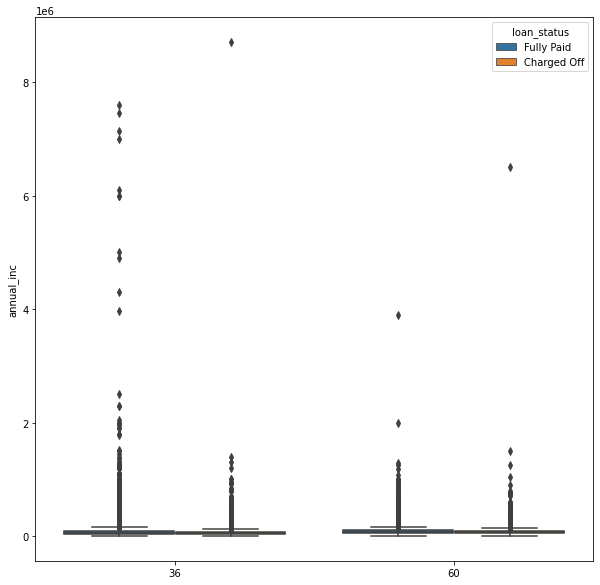

In [26]:
# outliers with high income tend to get 36 month loans
plt.figure(figsize=(10,10))
sns.boxplot(x=term, y='annual_inc', hue='loan_status', data=df)

<AxesSubplot:ylabel='annual_inc'>

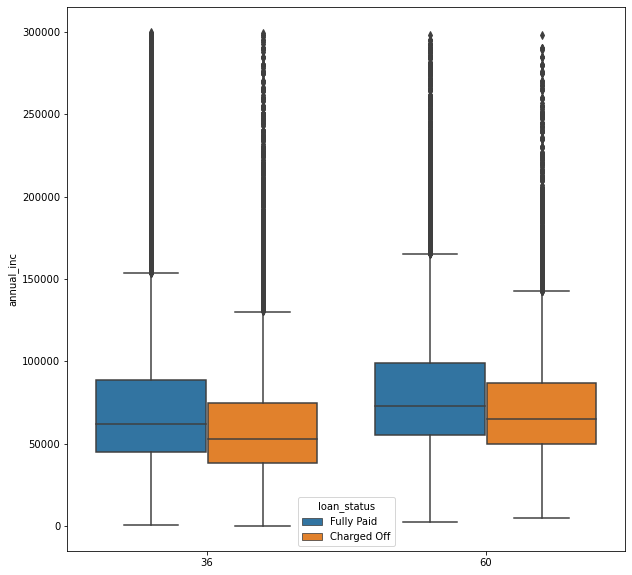

In [27]:
# for most people, they're just as likely to get 36 month or 60 month loans 
# People who default on their loans have slightly lower income irrespective of the loan term
term = np.array(list(no_outliers['term'].apply(str.split)))[:,0]
plt.figure(figsize=(10,10))
sns.boxplot(x=term, y='annual_inc', hue='loan_status', data=no_outliers)

#### Interest rate based on income

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

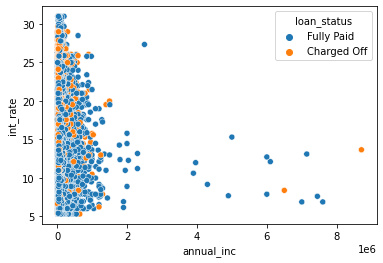

In [28]:
# People with higher annual income get lower interest rates 
sns.scatterplot(y='int_rate', x='annual_inc', data=df, hue='loan_status')

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


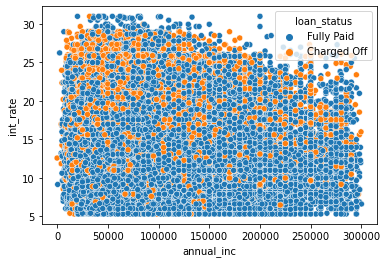

In [29]:
# most defaults happen for people with low income and high interest rates
sns.scatterplot(y='int_rate', x='annual_inc', data=no_outliers, hue='loan_status')

## Feature Engineering 

#### Turn target into dummy 

In [30]:
clean_df = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']]

In [31]:
clean_df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
clean_df.head()

<ipython-input-31-4921c44cd22b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1


#### Extract numerical value from term 

In [32]:
clean_df['term'] =  np.array(list(df['term'].apply(str.split)))[:,0].astype(float)
clean_df.head() # term now numerical

<ipython-input-32-91d0aa227c81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['term'] =  np.array(list(df['term'].apply(str.split)))[:,0].astype(float)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0


#### Transform grade to numerical values

In [33]:
# function that converts grade to numeric value
def gradeNum(grade):
    if grade == 'A':
        return 5
    elif grade == 'B':
        return 4
    elif grade == 'C':
        return 3
    elif grade == 'D':
        return 2
    elif grade == 'E':
        return 1
    else:
        return 0   
    
clean_df['grade'] = df['grade'].apply(gradeNum)
clean_df.head() # grade now numeric

<ipython-input-33-a6b664336e34>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['grade'] = df['grade'].apply(gradeNum)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,4
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,4
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,4
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,5
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,3


#### Transform subgrade to numerical values

In [34]:
# extract the numerical value from the subgrade (letter info already contained in grade)
clean_df['sub_grade'] = np.array(list(df['sub_grade'].str.split(pat='')))[:,2].astype(float) 
clean_df.head() # subgrade now numerical 

<ipython-input-34-c44bfd540f91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sub_grade'] = np.array(list(df['sub_grade'].str.split(pat='')))[:,2].astype(float)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,4,4.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,4,5.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,4,3.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,5,2.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,3,5.0


#### Extract numerical value from emp_length

In [35]:
df['emp_length'].value_counts()

10+ years                                126041
2 years                                   35827
< 1 year                                  31725
3 years                                   31665
5 years                                   26495
1 year                                    25882
4 years                                   23952
6 years                                   20841
7 years                                   20819
8 years                                   19168
<function <lambda> at 0x7fa2dbafe5e0>     18301
9 years                                   15314
Name: emp_length, dtype: int64

In [36]:
# function converts employment length to numeric value
def employment(emp):
    # less than 1 year
    if str(emp)[0] == '<':
        return 0.5
    # more than 10 years
    elif str(emp)[2] == '+':
        return 10 
    # 1-9 years 
    else: 
        return str(emp).split()[0]


clean_df['emp_length'] = df['emp_length'].apply(employment).astype(float)
clean_df.head() # employment length now numeric

<ipython-input-36-e6b3db9dddfc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['emp_length'] = df['emp_length'].apply(employment).astype(float)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,4,4.0,10.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,4,5.0,4.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,4,3.0,0.5
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,5,2.0,6.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,3,5.0,9.0


#### Change issue_d to datetime


In [37]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
clean_df['issue_month'] = df['issue_d'].dt.month
clean_df['issue_year'] = df['issue_d'].dt.year

clean_df.head() # month and year added

<ipython-input-37-6f062c7df02a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['issue_month'] = df['issue_d'].dt.month
<ipython-input-37-6f062c7df02a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['issue_year'] = df['issue_d'].dt.year


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,4,4.0,10.0,1,2015
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,4,5.0,4.0,1,2015
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,4,3.0,0.5,1,2015
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,5,2.0,6.0,11,2014
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,3,5.0,9.0,4,2013


#### Change earliest_cr_line to datetime

In [38]:
clean_df['credit_start_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year # earliest credit line year (month probably not important)
clean_df.head()

<ipython-input-38-0cde0f472b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['credit_start_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year # earliest credit line year (month probably not important)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,4,4.0,10.0,1,2015,1990
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,4,5.0,4.0,1,2015,2004
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,4,3.0,0.5,1,2015,2007
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,5,2.0,6.0,11,2014,2006
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,3,5.0,9.0,4,2013,1999


#### Add the difference between issue_year and credit_start_year

In [39]:
clean_df['time_diff'] = clean_df['issue_year'] - clean_df['credit_start_year']
clean_df.head()

<ipython-input-39-7433f7800e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['time_diff'] = clean_df['issue_year'] - clean_df['credit_start_year']


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year,time_diff
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0.0,0,36.0,4,4.0,10.0,1,2015,1990,25
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0.0,0,36.0,4,5.0,4.0,1,2015,2004,11
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0.0,0,36.0,4,3.0,0.5,1,2015,2007,8
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0.0,0,36.0,5,2.0,6.0,11,2014,2006,8
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0.0,1,60.0,3,5.0,9.0,4,2013,1999,14


#### Extract house or apartment info from address

In [40]:
df['address'].head(20)

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [41]:
# function determines if house 0 or apartment 1
def houseType(address):
    # apartment
    if 'apt' in address.lower():
        return 1 
    elif 'unit' in address.lower():
        return 1 
    elif 'suite' in address.lower():
        return 1 
    elif 'ste' in address.lower():
        return 1 
        
    # house
    else:
        return 0 
    
clean_df['houseType'] = df['address'].apply(houseType)
clean_df.head() # house type added

<ipython-input-41-74fd8510ded6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['houseType'] = df['address'].apply(houseType)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year,time_diff,houseType
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,36.0,4,4.0,10.0,1,2015,1990,25,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0,36.0,4,5.0,4.0,1,2015,2004,11,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0,36.0,4,3.0,0.5,1,2015,2007,8,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0,36.0,5,2.0,6.0,11,2014,2006,8,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,1,60.0,3,5.0,9.0,4,2013,1999,14,0


#### Make dummies for home_ownership, verification_status, purpose, initial_list_status, application_type

In [42]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [43]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [44]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [45]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [46]:
dummies = pd.get_dummies(df[['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']], drop_first=True)
dummies.head() # dummy variables 

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# concatenate dummies and clean features dataframe
clean_df = pd.concat([clean_df, dummies], axis = 1)
clean_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   dti                                  396030 non-null  float64
 5   open_acc                             396030 non-null  float64
 6   pub_rec                              396030 non-null  float64
 7   revol_bal                            396030 non-null  float64
 8   revol_util                           396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  mort_acc                             396030 non-null  float64
 11  pub_rec_bankr

In [130]:
clean_df = clean_df.astype(float)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   dti                                  396030 non-null  float64
 5   open_acc                             396030 non-null  float64
 6   pub_rec                              396030 non-null  float64
 7   revol_bal                            396030 non-null  float64
 8   revol_util                           396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  mort_acc                             396030 non-null  float64
 11  pub_rec_bankr

## Data Preprocessing

### Split into train and test 

In [131]:
X = clean_df.drop('default', axis=1).values
y = clean_df['default'].values

In [50]:
from sklearn.model_selection import train_test_split

In [132]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

### Scale Features

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
X_train = scaler.fit_transform(X_train)

In [135]:
X_valid = scaler.transform(X_valid)

In [136]:
X_test = scaler.transform(X_test)

In [137]:
X_train[0]

array([0.17594937, 0.25983638, 0.15549446, 0.00861417, 0.00146715,
       0.1       , 0.        , 0.04694292, 0.95      , 0.11409396,
       0.1875    , 0.        , 0.        , 0.6       , 0.        ,
       1.        , 0.        , 1.        , 0.85507246, 0.14925373,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        ])

## Modelling 
#### Build model

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam

In [59]:
X_train.shape

(207915, 44)

In [166]:
model = Sequential()

model.add(Dense(78, activation=LeakyReLU(alpha=0.1), kernel_initializer=RandomNormal(stddev=0.01), use_bias=True))
model.add(Dropout(0.3))

model.add(Dense(39, activation=LeakyReLU(alpha=0.1), kernel_initializer=RandomNormal(stddev=0.01), use_bias=True))
model.add(Dropout(0.3))

model.add(Dense(19, activation=LeakyReLU(alpha=0.1), kernel_initializer=RandomNormal(stddev=0.01), use_bias=True))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid', use_bias=True))

#### Compile model

In [167]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy')

#### Define early stopping condition

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

In [160]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

#### Fit model

In [168]:
model.fit(X_train, y_train, batch_size=256, epochs=1000, validation_data=(X_valid, y_valid), callbacks=early_stop)

Epoch 1/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.5203 - val_loss: 0.4723
Epoch 2/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4671 - val_loss: 0.4592
Epoch 3/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4620 - val_loss: 0.4573
Epoch 4/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4602 - val_loss: 0.4565
Epoch 5/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4590 - val_loss: 0.4561
Epoch 6/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4587 - val_loss: 0.4558
Epoch 7/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4555
Epoch 8/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4571 - val_loss: 0.4555
Epoch 9/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4569 - val_loss: 0.4553
Epoch 10/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.457

813/813 [==============================] - 1s 1ms/step - loss: 0.4475 - val_loss: 0.4473
Epoch 81/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4473 - val_loss: 0.4473
Epoch 82/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4471 - val_loss: 0.4481
Epoch 83/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4472 - val_loss: 0.4471
Epoch 84/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4473 - val_loss: 0.4475
Epoch 85/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4471 - val_loss: 0.4472
Epoch 86/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4470 - val_loss: 0.4473
Epoch 87/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4469 - val_loss: 0.4468
Epoch 88/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4467 - val_loss: 0.4467
Epoch 89/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4469 - v

813/813 [==============================] - 1s 1ms/step - loss: 0.4441 - val_loss: 0.4440
Epoch 160/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4440 - val_loss: 0.4443
Epoch 161/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4440 - val_loss: 0.4437
Epoch 162/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4439 - val_loss: 0.4440
Epoch 163/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4440 - val_loss: 0.4440
Epoch 164/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4440 - val_loss: 0.4438
Epoch 165/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4438 - val_loss: 0.4440
Epoch 166/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4436 - val_loss: 0.4437
Epoch 167/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4436 - val_loss: 0.4439
Epoch 168/1000
813/813 [==============================] - 1s 1ms/step - loss: 0

Epoch 238/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4427 - val_loss: 0.4426
Epoch 239/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4427 - val_loss: 0.4427
Epoch 240/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4424 - val_loss: 0.4433
Epoch 241/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4424 - val_loss: 0.4430
Epoch 242/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4427 - val_loss: 0.4428
Epoch 243/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4422 - val_loss: 0.4429
Epoch 244/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4424 - val_loss: 0.4431
Epoch 245/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4426 - val_loss: 0.4428
Epoch 246/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4424 - val_loss: 0.4424
Epoch 247/1000
813/813 [==============================] - 1s 1ms

Epoch 317/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4420 - val_loss: 0.4422
Epoch 318/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4419 - val_loss: 0.4425
Epoch 319/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4417 - val_loss: 0.4423
Epoch 320/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4419 - val_loss: 0.4419
Epoch 321/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4417 - val_loss: 0.4421
Epoch 322/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4412 - val_loss: 0.4424
Epoch 323/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4419 - val_loss: 0.4419
Epoch 324/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4413 - val_loss: 0.4419
Epoch 325/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.4415 - val_loss: 0.4417
Epoch 326/1000
813/813 [==============================] - 1s 1ms

#### Check training history

In [156]:
print(model.weights)

[<tf.Variable 'dense_79/kernel:0' shape=(44, 32) dtype=float32, numpy=
array([[ -1.0632937 ,   0.11603284,  -0.2082142 , ...,  -1.8825103 ,
          1.2665046 ,  -1.1527017 ],
       [ -3.5971694 ,  -2.2290535 ,  -4.0381856 , ...,  -2.042756  ,
          1.6683224 ,  -2.7588773 ],
       [  1.572841  ,  -0.16920178,   1.5677309 , ...,   0.78371346,
         -1.3172326 ,   0.3487796 ],
       ...,
       [ -0.18321966,  -0.45999324,  -0.59040093, ...,   0.49883068,
         -0.83548754,   0.15604436],
       [ -3.139067  ,  -3.1017349 ,  -1.3618386 , ...,  -2.3201985 ,
         -2.4862704 ,  -1.9316378 ],
       [ -9.490628  ,   5.051917  , -15.340163  , ..., -10.7681875 ,
         -2.0221183 ,  -3.9321878 ]], dtype=float32)>, <tf.Variable 'dense_79/bias:0' shape=(32,) dtype=float32, numpy=
array([-10.593125 ,  -6.031968 ,  -9.935882 ,  -8.737247 ,  -5.8175325,
        -5.2829757,  -1.8720869,  -8.315096 ,  -4.0831056,  -4.045436 ,
        -5.698784 ,  -5.7457914,  -9.983503 , -10.0257

<AxesSubplot:>

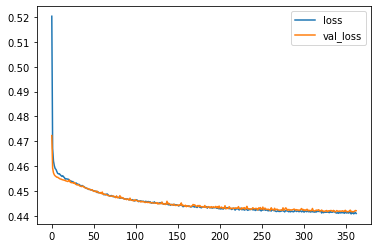

In [169]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Make predictions

In [170]:
predictions = model.predict_classes(X_test)

#### Evaluate model performance

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

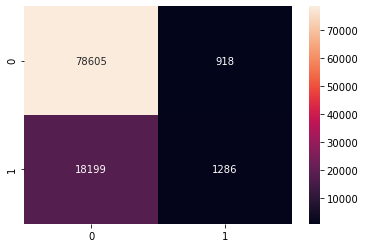

In [171]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [172]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     79523
         1.0       0.58      0.07      0.12     19485

    accuracy                           0.81     99008
   macro avg       0.70      0.53      0.51     99008
weighted avg       0.77      0.81      0.74     99008

